In [ ]:
! pip install transformers

     |████████████████████████████████| 3.8 MB 3.2 MB/s 
     |████████████████████████████████| 895 kB 6.8 MB/s 
     |████████████████████████████████| 6.5 MB 27.9 MB/s 
     |████████████████████████████████| 67 kB 4.6 MB/s 
     |████████████████████████████████| 596 kB 41.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from  transformers import pipeline
import re
import nltk
from collections import defaultdict
from google.colab import drive

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")

model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")

Downloading:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Results.csv")

In [ ]:
data.head()

,Unnamed: 0,id,resourceLink,tags,paragraph
0,0,6b9f6ff2-e3ce-5837-9249-3810010b1c17.json,https://www.makeuk.org/-/media/news-press-rele...,"{'external': ['test'], 'benefit': 'sustainable...",Guidance for SiGnatorieS of the uK Steel chart...
1,1,6b9f6ff2-e3ce-5837-9249-3810010b1c17.json,https://www.makeuk.org/-/media/news-press-rele...,"{'external': ['test'], 'benefit': 'sustainable...",Production & consumption of Steel in the uK\nG...
2,2,6b9f6ff2-e3ce-5837-9249-3810010b1c17.json,https://www.makeuk.org/-/media/news-press-rele...,"{'external': ['test'], 'benefit': 'sustainable...",currently half of this is supplied by uK steel...
3,3,6b9f6ff2-e3ce-5837-9249-3810010b1c17.json,https://www.makeuk.org/-/media/news-press-rele...,"{'external': ['test'], 'benefit': 'sustainable...",as the Government’s industrial Strategy propos...
4,4,6b9f6ff2-e3ce-5837-9249-3810010b1c17.json,https://www.makeuk.org/-/media/news-press-rele...,"{'external': ['test'], 'benefit': 'sustainable...",it’s not just about apprenticeships though; 65...


In [ ]:
class Summarizor:
    def __init__(self,data):
        
        #categrorizing data frame accoridng to industry
        industry = []
        for content in data['tags']:
            industry.append(ast.literal_eval(content)['industry'])
        self.data = data
        self.data['industry'] = industry
        self.__summarizor = pipeline('summarization', model = 'facebook/bart-large-cnn')
        
    def industry_analysis(self):
        
        #printing value counts
        print("Value Counts:\n")
        print(self.data['industry'].value_counts(),"\n")
        
        #Visualizng the industry frequencies
        sns.set_theme()
        plt.figure(figsize=(8,8))
        sns.countplot(x = data['industry'])
        plt.xlabel("Indsutry")
        plt.ylabel("Frequency")
        plt.title("Indutries which texts are extracted")
        plt.xticks(rotation = 45);
    
    
    def __basic_preprocess_function(self, text):
        sentence = text.lower()
        sentence = re.sub(r'\n',"",sentence)
        sentence = re.sub(r'Figure\s\d:','', sentence)
        ###removing emojis
        regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"  # flags (iOS)
                           "]+", flags = re.UNICODE)
        sentence = regrex_pattern.sub('', sentence)
        return sentence
        
    def basic_preprocessor(self,industry_name,show_content = False):
    
        #selecting only the relevant paras according to industries
        self.__industryname = industry_name
        self.__df = self.data[self.data['industry'] == industry_name]
        self.content = self.__df['paragraph'].tolist()
        length_before = len(self.content)
        self.content = list(set(self.content))
        print("\nFiltering only unique values\n")
        print("Number of rows affected: {}".format(length_before - len(self.content)))
        
        
        #preprocessing
        bfr_preprocessed = self.content[:2]
        self.pre_content = list(map(self.__basic_preprocess_function,self.content))
        print("".center(40,"="))
        print("Preprocessing completed\n")
        if show_content:
            print("Before preprocesing\n")
            print(bfr_preprocessed)
            print("\nAfter Preprocessing\n")
            print(self.pre_content[:2])
        
    
    def summarizing_capability(self): 
        #Aserting summarization capabilities
        try:
            preprocessed_content = self.pre_content 
        except:
            print("Please Run the method 'Basic Preprocessor' and run the this method again!!!")
        
        else:
            for index,sentence in enumerate(preprocessed_content):
                    length_of_sentence = len(tokenizer.encode(sentence))
                    assert_message = f"Maximum Number of tokens are exceeded.\n Summarization will result in error.\n Index of the sentence is {index}.\n Length of tokens {length_of_sentence}"
                    assert tokenizer.model_max_length > length_of_sentence, assert_message
    
    
    def __Text_summarizor(self, para):
        sentences = []
        total_sentences = []
        length = 0
        initial_sentences = nltk.tokenize.sent_tokenize(para)
        for sents in initial_sentences:
            length += len(tokenizer.encode(sents))#checking the number of tokens
            if length < tokenizer.model_max_length:
                sentences.append(sents)#appending sentences until 1024
            else:
                total_sentences.append(sentences)#if max tokens are exceeded, sentences are appended to another list as a whole
                length = len(tokenizer.encode(sents))
                sentences = []
                sentences.append(sents)
        system_summary = []
        if total_sentences:
            for index in range(len(total_sentences)):
                text = " ".join(total_sentences[index])
                system_summary.append(self.__summarizor(text)[0]['summary_text'])
                
            if sentences:#when sentences are both in total_sentences list and sentences list
                text1 = "".join(sentences)
                if (len(tokenizer.encode(text1)) >50):
                    system_summary.append(self.__summarizor(text1)[0]['summary_text'])
            final_summary = " ".join(system_summary)
            return final_summary
        else:
            print("Tokens are not exceeded")
            text3 = " ".join(sentences)#when tokens are not exceeded
            return self.__summarizor(text3)[0]['summary_text']
        
    def get_summary(self, save = True):
        try:
          self.summary_data = defaultdict(list)
          print("\nTotal Number of Contents to be summarized: {}\n".format(len(self.pre_content)))
          for index,content in enumerate(self.pre_content):
            if (len(tokenizer.encode(content)) <= 142):#If the tokens are less than 142, these sentences are appended without summarising
              self.summary_data['summary'].append(content)
            else:
              summary = self.__Text_summarizor(content)
              self.summary_data['summary'].append(summary)
              print(f'summary completed: para {index+1}')
              #print(summary)
          self.summary_data['original_para'] = self.pre_content
          self.summary_data = pd.DataFrame(self.summary_data)
          if save:
            self.summary_data.to_csv(f"/content/drive/MyDrive/Colab Notebooks/{self.__industryname}.csv")
            print("CSV file successfully saved to drive")
          return self.summary_data
        except:
            print("Please Run the method 'Basic Preprocessor' and run the this method again!!!")   
        

In [ ]:
s1 = Summarizor(data)

Value Counts:

floristry         7004
steel             6984
supermarkets      3653
Life Insurance    3014
iron              2466
fashion           2210
Name: industry, dtype: int64 



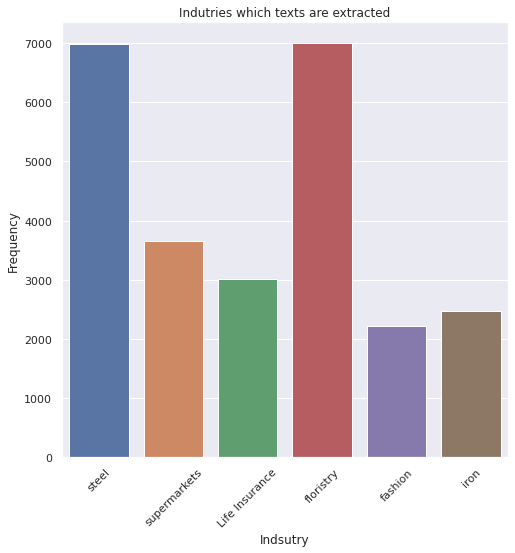

In [ ]:
s1.industry_analysis()

In [ ]:
s1.basic_preprocessor('fashion')


Filtering only unique values

Number of rows affected: 11
Preprocessing completed



In [ ]:
s1.summarizing_capability()

Token indices sequence length is longer than the specified maximum sequence length for this model (1046 > 1024). Running this sequence through the model will result in indexing errors


AssertionError: ignored

In [ ]:
df = s1.get_summary()


Total Number of Contents to be summarized: 2199

Tokens are not exceeded
summary completed: para 1
Tokens are not exceeded
summary completed: para 6
Tokens are not exceeded
summary completed: para 22
Tokens are not exceeded
summary completed: para 23
Tokens are not exceeded
summary completed: para 30
Tokens are not exceeded
summary completed: para 33
Tokens are not exceeded
summary completed: para 37
Tokens are not exceeded
summary completed: para 43
Tokens are not exceeded
summary completed: para 44
Tokens are not exceeded
summary completed: para 45
Tokens are not exceeded
summary completed: para 46
Tokens are not exceeded
summary completed: para 53
Tokens are not exceeded
summary completed: para 61
Tokens are not exceeded
summary completed: para 63
Tokens are not exceeded
summary completed: para 65
Tokens are not exceeded
summary completed: para 67
Tokens are not exceeded
summary completed: para 75
Tokens are not exceeded
summary completed: para 81
Tokens are not exceeded
summary co

Your max_length is set to 142, but you input_length is only 101. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


summary completed: para 260
Tokens are not exceeded
summary completed: para 265
Tokens are not exceeded
summary completed: para 266
Tokens are not exceeded
summary completed: para 275
Tokens are not exceeded
summary completed: para 276
Tokens are not exceeded
summary completed: para 277
Tokens are not exceeded
summary completed: para 279
Tokens are not exceeded
summary completed: para 280
Tokens are not exceeded
summary completed: para 283
Tokens are not exceeded
summary completed: para 286
Tokens are not exceeded
summary completed: para 292
Tokens are not exceeded
summary completed: para 297
Tokens are not exceeded
summary completed: para 299
Tokens are not exceeded
summary completed: para 302
Tokens are not exceeded
summary completed: para 303
Tokens are not exceeded
summary completed: para 305
Tokens are not exceeded
summary completed: para 310
Tokens are not exceeded
summary completed: para 314
Tokens are not exceeded
summary completed: para 315
Tokens are not exceeded
summary comp

Your max_length is set to 142, but you input_length is only 3. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=1)


summary completed: para 1523
Tokens are not exceeded
summary completed: para 1525
Tokens are not exceeded
summary completed: para 1526
Tokens are not exceeded
summary completed: para 1528
Tokens are not exceeded
summary completed: para 1529
Tokens are not exceeded
summary completed: para 1534
Tokens are not exceeded
summary completed: para 1535
Tokens are not exceeded
summary completed: para 1536
Tokens are not exceeded
summary completed: para 1538
Tokens are not exceeded
summary completed: para 1539
Tokens are not exceeded
summary completed: para 1540
Tokens are not exceeded
summary completed: para 1541
Tokens are not exceeded
summary completed: para 1542
Tokens are not exceeded
summary completed: para 1543
Tokens are not exceeded
summary completed: para 1545
Tokens are not exceeded
summary completed: para 1546
Tokens are not exceeded
summary completed: para 1548
summary completed: para 1551
Tokens are not exceeded
summary completed: para 1553
Tokens are not exceeded
summary completed